# 1.Understanding the Data:

Import necessary libraries (e.g., pandas, matplotlib, seaborn).<br>
Load the COVID-19 dataset.<br>
Display basic information about the dataset (e.g., data types, missing values).<br>

In [1]:
# load required libraries/modules

# Load the dataset

import pandas as pd

df = pd.read_csv(r'C:\Users\suppala\Downloads\covid_19_data.csv')


## Display basic information about the dataset


In [2]:
# To display first five records of the dataset.

df.head() 

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
# To get the  basic information like number of columns, column labels, column data types, 
# memory usage, range index, and the number of cells in each column (non-null values)..

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [4]:
#Checking the number of rows and columns of the Data set

df.shape

(306429, 8)

# 2. Data Cleaning:

Handle missing values.
Convert data types if necessary.
Check for duplicates.

In [5]:
# Handle missing values

#Checking the number of missing values by using isna() function

df.isna().sum()



SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [6]:
#Renaming the columns for easy usage

df.rename(columns = {'Province/State' : 'Province_State',
                     'Country/Region' : 'Country_Region',
                     'Last Update' : 'Last_Update',
                    }, inplace = True)

In [7]:
# Get the mode of Province/State using mode() and use fillna() to fill the missing values.

for i in df:
    if df[i].dtypes == 'object':
        m = df[i].mode()[0]
        df[i] = df[i].fillna(m)

In [8]:
#Checking if the missing values are filled

df.isna().sum()


SNo                0
ObservationDate    0
Province_State     0
Country_Region     0
Last_Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [9]:
# Convert data types if necessary ( ObservationDate    datetime64[ns]) change to datetime

df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

#Check if the data type is conveted by dtypes

df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province_State             object
Country_Region             object
Last_Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [10]:
# Check for duplicates

print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 0


# 3. Descriptive Statistics:

Generate descriptive statistics (mean, median, min, max) for numeric columns.<br>
Explore summary statistics for categorical columns.

In [11]:
# Descriptive statistics of numerical data

df[['Confirmed','Deaths','Recovered']].describe()


,Confirmed,Deaths,Recovered
count,3.064290e+05,306429.000000,3.064290e+05
mean,8.567091e+04,2036.403268,5.042029e+04
std,2.775516e+05,6410.938048,2.015124e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037500e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


In [12]:
# Summary statistics for categorical columns

df.describe(include='object')

,Province_State,Country_Region,Last_Update
count,306429,306429,306429
unique,736,229,1905
top,Unknown,Russia,2021-04-02 15:13:53
freq,82226,30251,239885


# 4. Time Series Analysis:

Analyze the trends in confirmed, deaths, and recovered cases over time.<br>
Create time-based visualizations.

In [13]:
# Time series analysis
# groupby 'ObservationDate' and apply aggregation functions like sum on deaths,confirmed ,recovered 

df_time = df.groupby('ObservationDate').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

df_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


<Axes: xlabel='ObservationDate', ylabel='Confirmed'>

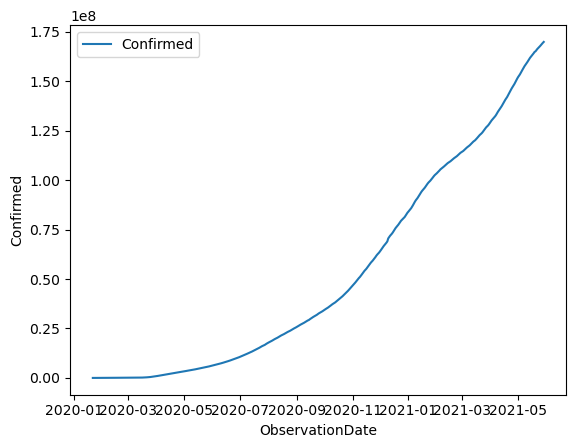

In [14]:
# Plot time series data using line plot
# Line plot for Confirmed cases

import seaborn as sns
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')


<Axes: xlabel='ObservationDate', ylabel='Deaths'>

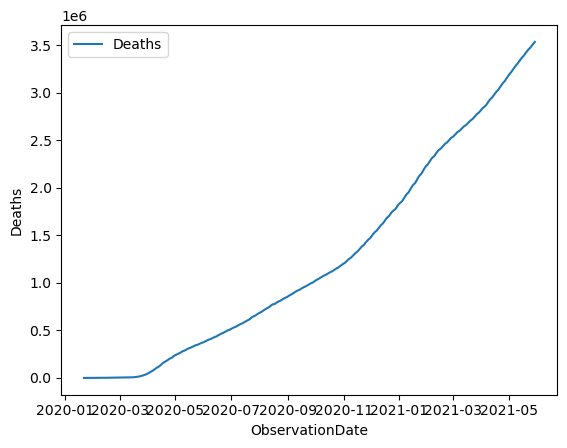

In [16]:
#Line plot for number of deaths

sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')

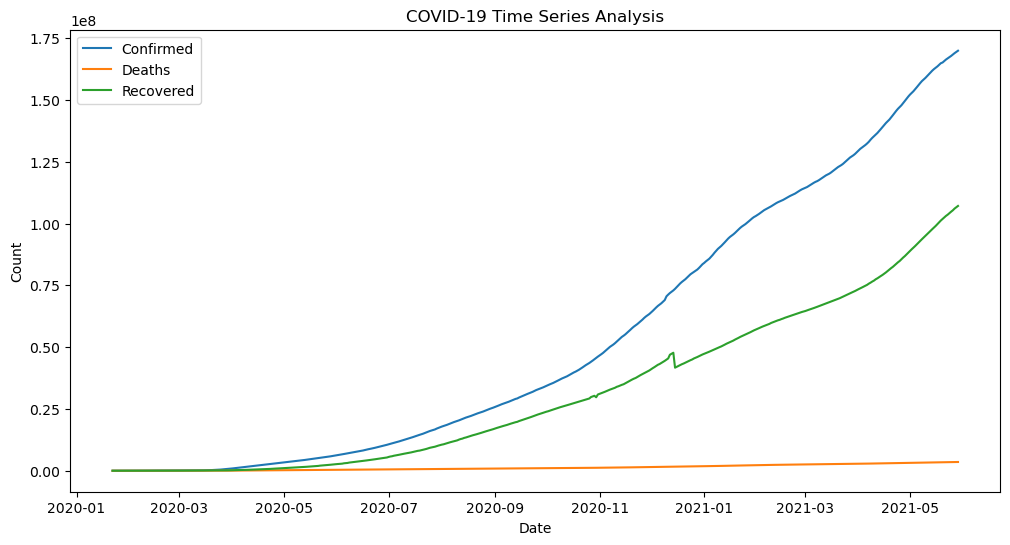

In [16]:
# Plot time series data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_time, x='ObservationDate', y='Confirmed', label='Confirmed')
sns.lineplot(data=df_time, x='ObservationDate', y='Deaths', label='Deaths')
sns.lineplot(data=df_time, x='ObservationDate', y='Recovered', label='Recovered')
plt.title('COVID-19 Time Series Analysis')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# 5. Geographical Analysis:

Analyze the distribution of cases across different countries/regions.<br>
Create geographical visualizations (e.g., world map).

In [17]:
# Geographical analysis

df_country = df.groupby('Country_Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

df_country

,Confirmed,Deaths,Recovered
Country_Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
...,...,...,...
West Bank and Gaza,41819444.0,440378.0,37003116.0
Yemen,962066.0,237613.0,506523.0
Zambia,13493953.0,205990.0,12625626.0


In [18]:
df_country.sort_values('Confirmed',ascending = False)

,Confirmed,Deaths,Recovered
Country_Region,,,
US,6.049146e+09,123303762.0,5.033710e+08
India,3.226768e+09,44424723.0,2.900590e+09
Brazil,2.653588e+09,72624610.0,2.313677e+09
Russia,9.305488e+08,18363719.0,7.907057e+08
France,8.551890e+08,22720818.0,6.940743e+07
...,...,...,...
Cape Verde,1.000000e+00,0.0,0.000000e+00
The Gambia,1.000000e+00,0.0,0.000000e+00
Republic of the Congo,1.000000e+00,0.0,0.000000e+00


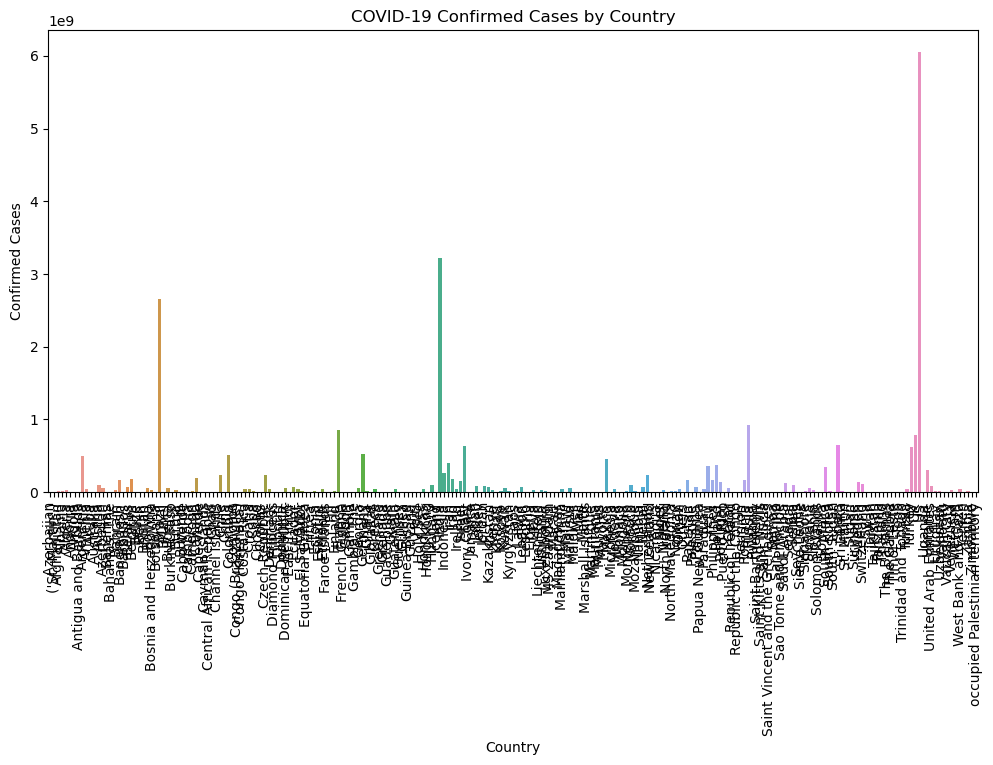

In [19]:
# Geographical analysis
df_country = df.groupby('Country_Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

# Plot geographical data
plt.figure(figsize=(12, 6))
sns.barplot(x=df_country.index, y='Confirmed', data=df_country)
plt.title('COVID-19 Confirmed Cases by Country')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=90, ha='center')
plt.show()

# 6. Correlation Analysis:

Examine the correlation between different numeric variables.

In [21]:
# Correlation analysis between confirmed,deaths and recovered

df1 = df[['Confirmed','Deaths','Recovered']].corr()

df1


,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.888416,0.633479
Deaths,0.888416,1.000000,0.538416
Recovered,0.633479,0.538416,1.000000


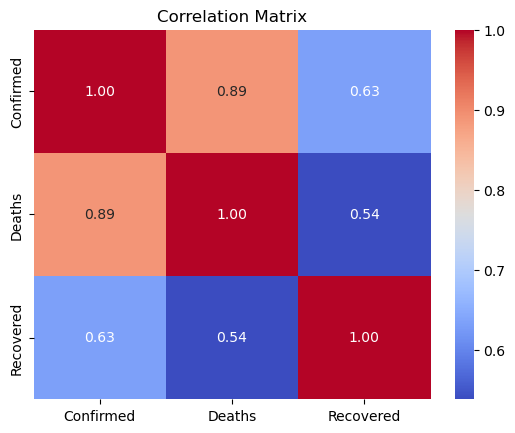

In [22]:
# Plot correlation matrix
sns.heatmap(df1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 7. Advanced Analysis:

Explore advanced visualizations or statistical tests based on the specific questions you want to answer.

In [23]:
# Calculate the total number of confirmed cases, deaths, and recoveries for each country/region.

df_country = df.groupby('Country_Region').agg({'Confirmed': 'sum', 'Deaths': 'sum', 'Recovered': 'sum'})

df_country

,Confirmed,Deaths,Recovered
Country_Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
...,...,...,...
West Bank and Gaza,41819444.0,440378.0,37003116.0
Yemen,962066.0,237613.0,506523.0
Zambia,13493953.0,205990.0,12625626.0


In [24]:
# Identify the countries/regions with the highest number of confirmed cases, deaths, and recoveries.

# Country with the highest number of confirmed cases:

df_country.sort_values('Confirmed',ascending = False).head(1)[["Confirmed"]]



,Confirmed
Country_Region,
US,6.049146e+09


In [25]:
# Country with the highest number of Deaths:

df_country.sort_values('Deaths',ascending = False).head(1)[["Deaths"]]

,Deaths
Country_Region,
US,123303762.0


In [26]:
#Country with the highest number of recovered cases:

df_country.sort_values('Recovered',ascending = False).head(1)[["Recovered"]]


,Recovered
Country_Region,
India,2.900590e+09


In [27]:
# Dstribution of deaths across countries (Top 30)

deaths = df.groupby(by=['Country_Region']).Deaths.sum()

deaths = deaths.sort_values(ascending = False)

In [28]:
deaths[:30]

Country_Region
US                123303762.0
Brazil             72624610.0
India              44424723.0
Mexico             43005509.0
UK                 29171984.0
Italy              26000702.0
France             22720818.0
Spain              19065104.0
Russia             18363719.0
Iran               15744407.0
Colombia           13981703.0
Germany            13364216.0
Peru               13194771.0
Argentina          12112441.0
South Africa       10250036.0
Poland              8951676.0
Indonesia           7770329.0
Turkey              6841158.0
Belgium             6292525.0
Ukraine             6228387.0
Chile               5717374.0
Canada              5692896.0
Romania             4626607.0
Ecuador             4540233.0
Netherlands         4168395.0
Czech Republic      3989185.0
Iraq                3732114.0
Pakistan            3537569.0
Sweden              3336122.0
Hungary             3300223.0
Name: Deaths, dtype: float64

<Axes: xlabel='Country_Region'>

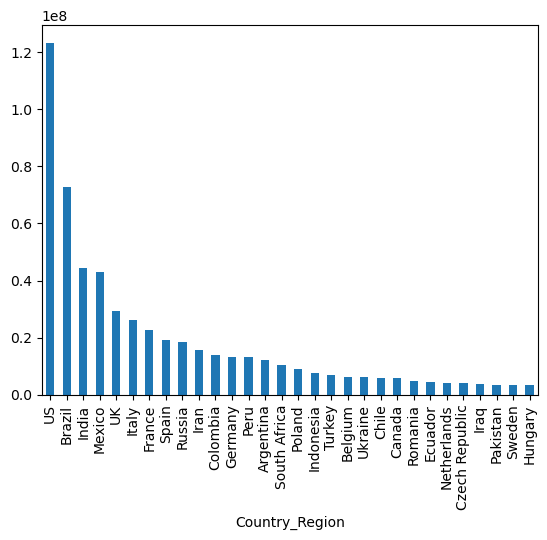

In [29]:
# Visualize the distribution of deaths using bar chart

deaths[:30].plot.bar()


In [30]:
# Dstribution of Recovered cases across countries (Top 30)

recovered = df.groupby(by=['Country_Region']).Recovered.sum()

recovered = recovered.sort_values(ascending = False)

In [31]:
recovered[:30]

Country_Region
India             2.900590e+09
Brazil            2.313677e+09
Russia            7.907057e+08
Turkey            5.641706e+08
US                5.033710e+08
Italy             4.877998e+08
Colombia          4.687470e+08
Germany           4.533833e+08
Argentina         4.387503e+08
Mexico            3.617802e+08
Iran              3.268130e+08
Peru              3.236728e+08
South Africa      3.100376e+08
Poland            3.098354e+08
Ukraine           2.344107e+08
Indonesia         2.264162e+08
Chile             2.170492e+08
Czech Republic    2.078958e+08
Canada            1.715769e+08
Iraq              1.650607e+08
Romania           1.517079e+08
Pakistan          1.460199e+08
Philippines       1.428491e+08
Israel            1.420200e+08
Bangladesh        1.329821e+08
Portugal          1.206190e+08
Saudi Arabia      1.145815e+08
Morocco           9.715260e+07
Austria           8.905054e+07
Jordan            7.944242e+07
Name: Recovered, dtype: float64

<Axes: xlabel='Country_Region'>

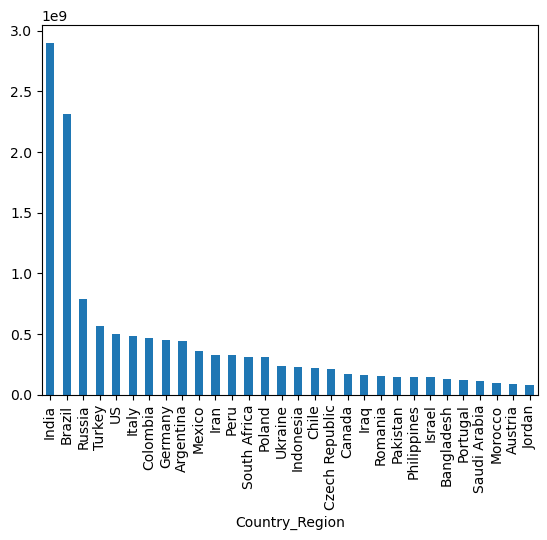

In [32]:
# Visualize the distribution of Recovered cases using bar chart

recovered[:30].plot.bar()
